# MD at constant temperature

1. Perform a simulation of a Lennard Jones crystal with 864 particles. Temperature should be controlled using the Langevin thermostat at temperature T = 2. Try with different values of the friction γ (e.g. 0.01, 0.1, 1.0,10.0) and look at the difference in the behavior of the potential energy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from numba import njit
from scipy.spatial import distance_matrix

In [5]:
# random initialization of (q,p) for 3N degrees of freedom, being N=864
#[qx,qy,qz,px,py,pz]=np.random.rand(6,864)

In [3]:
nparticles=1
q=np.random.rand(nparticles,3)
p=np.random.rand(nparticles,3)
print(p)
print(q)

[[0.79751161 0.93265783 0.36082756]]
[[0.85107425 0.05563837 0.16842818]]


In [4]:
# Langevin thermostat
m=1
dt=10**(-3)
N=100
kbT=2
gamma=0.01
epsilon=1.5
sigma=3.7

In [5]:
U=np.zeros(N)
K=np.zeros(N)

for i in range(N):
    distances=distance_matrix(q,q)
    for j in range(nparticles):
        distances[j,j]=np.infty
        
    # compute the forces:
    f=np.zeros((nparticles,nparticles,3))
    for j in range(nparticles):
        for k in range(nparticles):
            f[j,k,:]=-4*epsilon*(-12*sigma**12/distances[j,k]**14*(q[j,:]-q[j,:])+6*sigma**6/distances[j,k]**8*(q[j,:]-q[k,:]))
    U[i]=4*epsilon*1/2*(sigma**12*np.sum(distances**(-12))-sigma**6*np.sum(distances**(-6)))
    K[i]=np.sum(p**2)/(2*m)
    
    q=q+(p/m)*dt
    p=p+(np.sum(f,axis=0)-gamma*p+np.sqrt(2*m*kbT*gamma)*np.random.rand(nparticles,3))*dt
    

[0.81803596 0.8181617  0.81847425 0.81879735 0.81903385 0.81932352
 0.81948903 0.81985345 0.81998604 0.82013419 0.82029183 0.82042349
 0.82063079 0.82087843 0.82101798 0.82124223 0.8215807  0.82166878
 0.82193047 0.82208977 0.82217308 0.82241606 0.82253178 0.82275559
 0.82298739 0.8232112  0.82336101 0.82367365 0.82374479 0.82395724
 0.82425616 0.82433331 0.82446242 0.82464633 0.82480944 0.82494958
 0.82522883 0.82540701 0.82558954 0.82571456 0.82591888 0.82617725
 0.8264262  0.82647738 0.82679477 0.82693989 0.82717288 0.82741421
 0.82768802 0.82783793 0.82798946 0.82820158 0.8284354  0.82874131
 0.82904754 0.82918942 0.82945824 0.829646   0.82987092 0.83006784
 0.83030123 0.83061453 0.83074376 0.83089938 0.8311961  0.83134621
 0.8316449  0.8317841  0.83188649 0.83206873 0.83231329 0.83261009
 0.83272616 0.83295198 0.83325072 0.83337241 0.8335087  0.8337274
 0.83394862 0.83415474 0.83421711 0.83444808 0.83473074 0.83495374
 0.83514288 0.83533176 0.83541522 0.83546291 0.83561424 0.83585

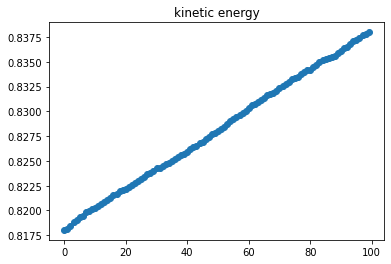

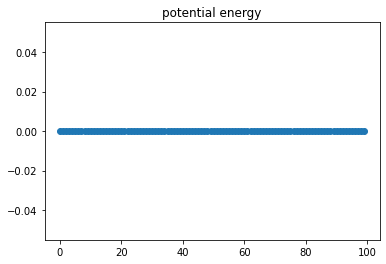

In [6]:
plt.figure()
plt.plot(K,'o--')
print(K)
plt.title('kinetic energy')

plt.figure()
plt.title('potential energy')
plt.plot(U,'o--')

In [7]:
#def thermostat(m,dt,N,kbT,gamma):    
for i in range(N):
    r=qx**2+qy**2+qz**2
        
    distances=distance_matrix([qx,qy,qz],[qx,qy,qz])
    print(distances)
    for j in range(N):
        distances[j,j]=np.infty
    [fx,fy,fz]=[qx,qy,qz]*4*epsilon/r*(-12*sigma**12/r**13+6*sigma**6/r**7)
    [qx,qy,qz]=[qx,qy,qz]+[px,py,pz]/m*dt

    [px,py,pz]=[px,py,pz]+[fx,fy,fz]*dt-gamma*[px,py,pz]*dt+np.sqrt(2*m*kbT*gamma)*np.random.rand(1)
    
    #return qx,qy,qz,px,py,pz,U
    

NameError: name 'qx' is not defined